# Marriage and Education


In [195]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [196]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from utils import decorate, value_counts

from utils import add_title, add_aibm_logo, add_subtext, savefig

In [197]:
# Make the figures smaller to save some screen real estate.
plt.rcParams["figure.dpi"] = 100
plt.rcParams["figure.figsize"] = [6.75, 3.5]

# AIBM brand colors
aibm_light_gray = "#F3F4F3"
aibm_medium_gray = "#767676"
aibm_green = "#0B8569"
light_green = "#AAC9B8"
aibm_orange = "#C55300"
light_orange = "#F4A26B"
aibm_purple = "#9657A5"
light_purple = "#CFBCD0"
aibm_blue = "#4575D6"
light_blue = "#C9D3E8"

# additional colors from coolers.co
dark_gray = "#404040"
dark_purple = "#28112B"
dark_green = "#002500"
amber = "#F5BB00"
oxford_blue = "#000022"
bittersweet = "#FF6666"
crimson = "#D62839"

colors = [aibm_orange, aibm_green, aibm_blue, aibm_purple]
cycler = plt.cycler(color=colors)
plt.rc("axes", prop_cycle=cycler)

# tick and label colors
plt.rcParams["axes.edgecolor"] = aibm_medium_gray  # Spines (axis border)
plt.rcParams["xtick.color"] = aibm_medium_gray  # X-axis ticks
plt.rcParams["ytick.color"] = aibm_medium_gray  # Y-axis ticks
plt.rcParams["axes.labelcolor"] = aibm_medium_gray  # Axis labels

# remove all spines
plt.rcParams["axes.spines.top"] = False
plt.rcParams["axes.spines.right"] = False
plt.rcParams["axes.spines.left"] = False
plt.rcParams["axes.spines.bottom"] = False

# light gray horizontal grid lines
plt.rcParams["grid.color"] = aibm_light_gray
plt.rcParams["grid.linestyle"] = "-"  # Solid lines
plt.rcParams["grid.linewidth"] = 1  # Thin lines
plt.rcParams["axes.grid"] = True  # Enable grid
plt.rcParams["axes.grid.axis"] = "y"  # Apply only to horizontal lines

# Remove tick marks
plt.rcParams["xtick.major.size"] = 0
plt.rcParams["xtick.minor.size"] = 0
plt.rcParams["ytick.major.size"] = 0
plt.rcParams["ytick.minor.size"] = 0

# Use PT Sans as the default font
plt.rcParams["font.family"] = "PT Sans"

## Data

Read the combined file with data up through 2022.

In [198]:
df22 = pd.read_stata("cps_00012.dta.gz", convert_categoricals=False)
df22.head()

,year,serial,month,hwtfinl,cpsid,pernum,wtfinl,cpsidv,cpsidp,age,sex,race,marst,educ,frever,frage1,frbirthy1,frsuppwt
0,1976,1,6,NaN,1.976050e+13,1,1619.42,1.976050e+14,1.976050e+13,24,1,100,1,110,999,NaN,NaN,1619.42
1,1976,1,6,NaN,1.976050e+13,2,1436.61,1.976050e+14,1.976050e+13,19,2,100,1,72,0,NaN,NaN,1436.61
2,1976,2,6,NaN,1.976050e+13,1,1522.36,1.976050e+14,1.976050e+13,48,1,100,1,72,999,NaN,NaN,1522.36
3,1976,2,6,NaN,1.976050e+13,2,1614.59,1.976050e+14,1.976050e+13,45,2,100,1,72,3,NaN,NaN,1614.59
4,1976,2,6,NaN,1.976050e+13,3,1365.79,1.976050e+14,1.976050e+13,16,2,100,6,50,0,NaN,NaN,1365.79


In [199]:
df22['weight'] = df22['wtfinl'] / df22['wtfinl'].mean()

In [200]:
value_counts(df22['marst'])

,counts
values,
1,1678253
2,44627
3,44262
4,202217
5,148589
6,832208
7,105962
9,758354


In [201]:
df22['educ'] = df22['educ'].replace(999, np.nan)
value_counts(df22['educ'])

,counts
values,
1.0,655054
2.0,14681
10.0,11910
11.0,1863
12.0,4393
13.0,7402
14.0,9470
20.0,22336
21.0,11835


Note: 1990 and earlier, code 110 means 4 years of college. 1992 and later, code 111 means bachelor's degree. 

In [202]:
df22['bach'] = np.where(df22['educ'].notna(), df22['educ'] >= 110, np.nan)
value_counts(df22['bach'])

,counts
values,
0.0,3078737
1.0,629783
NaN,105952


In [203]:
df22['marst'] = df22['marst'].replace(9, np.nan)
value_counts(df22['marst'])

,counts
values,
1.0,1678253
2.0,44627
3.0,44262
4.0,202217
5.0,148589
6.0,832208
7.0,105962
NaN,758354


In [204]:
df22['evrmarry'] = np.where(df22['marst'].notna(), df22['marst'] != 6, np.nan)
value_counts(df22['evrmarry'])

,counts
values,
0.0,832208
1.0,2223910
NaN,758354


In [205]:
df22['married'] = np.where(df22['marst'].notna(), df22['marst'] <= 2, np.nan)
value_counts(df22['married'])

,counts
values,
0.0,1333238
1.0,1722880
NaN,758354


### 2024 data

In [206]:
df24_all = pd.read_csv('jun24pub.csv')

In [207]:
df24_all.columns = df24_all.columns.str.lower()
df24_all.head()

,hrhhid,hrmonth,hryear4,hurespli,hufinal,filler,hetenure,hehousut,hetelhhd,hetelavl,...,ptsf1,ptsf2,pesf3a,pesf3b,ptsayfc,prfblvarr,pxsf1,pxsf2,pxsf3a,pxsf3b
0,871700909505103,6,2024,-1,226,NaN,-1,1,-1,-1,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
1,780191091005286,6,2024,1,201,NaN,1,1,1,-1,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
2,8110061752989,6,2024,1,201,NaN,1,1,1,-1,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
3,8110061752989,6,2024,1,201,NaN,1,1,1,-1,...,2,2016,1,-1,26,1,-1,-1,-1,-1
4,8110061752989,6,2024,1,201,NaN,1,1,1,-1,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1


In [208]:
column_map = {
    'hryear4': 'year',
    'pwsswgt': 'wtfinl',
    'prtage': 'age',
    'pesex': 'sex',
    'ptdtrace': 'race',
    'pemaritl': 'marst',
    'peeduca': 'educa',
}

In [209]:
keys = list(column_map.keys())
df24 = df24_all[keys].rename(columns=column_map).replace(-1, np.nan)
df24.head()

,year,wtfinl,age,sex,race,marst,educa
0,2024,0,NaN,NaN,NaN,NaN,NaN
1,2024,23264844,60.0,1.0,1.0,6.0,39.0
2,2024,22623825,42.0,1.0,1.0,1.0,42.0
3,2024,24438382,33.0,2.0,4.0,1.0,39.0
4,2024,35191236,8.0,1.0,8.0,NaN,NaN


In [210]:
df24['year'].describe()

count    126112.0
mean       2024.0
std           0.0
min        2024.0
25%        2024.0
50%        2024.0
75%        2024.0
max        2024.0
Name: year, dtype: float64

In [211]:
df24['weight'] = df24['wtfinl'] / df24['wtfinl'].mean()

In [212]:
value_counts(df24['educa'])

,counts
values,
31.0,207
32.0,371
33.0,728
34.0,1410
35.0,1867
36.0,2179
37.0,2206
38.0,1399
39.0,23257


In [213]:
df24['bach'] = np.where(df24['educa'].notna(), df24['educa'] >= 43, np.nan)
value_counts(df24['bach'])

,counts
values,
0.0,54083
1.0,28217
NaN,43812


In [214]:
value_counts(df24['marst'])

,counts
values,
1.0,41180
2.0,1251
3.0,5317
4.0,8315
5.0,1271
6.0,24966
NaN,43812


In [215]:
df24['evrmarry'] = np.where(df24['marst'].notna(), df24['marst'] != 6, np.nan)
value_counts(df24['evrmarry'])

,counts
values,
0.0,24966
1.0,57334
NaN,43812


In [216]:
df24['married'] = np.where(df24['marst'].notna(), df24['marst'] <= 2, np.nan)
value_counts(df24['married'])

,counts
values,
0.0,39869
1.0,42431
NaN,43812


### Combine

In [217]:
df_all = pd.concat([df22, df24]).dropna(subset=["marst"])
df_all.shape

(3138418, 23)

In [218]:
from utils import round_into_bins

df_all["age_group"] = round_into_bins(df_all["age"], 3, low=14) + 1
df_all.groupby("age_group")["age"].describe()

,count,mean,std,min,25%,50%,75%,max
age_group,,,,,,,,
15.0,151294.0,15.226975,0.737332,14.0,15.0,15.0,16.0,16.0
18.0,178013.0,17.966845,0.815428,17.0,17.0,18.0,19.0,19.0
21.0,166106.0,21.000187,0.814719,20.0,20.0,21.0,22.0,22.0
24.0,170472.0,24.008412,0.817812,23.0,23.0,24.0,25.0,25.0
27.0,173074.0,27.004437,0.816980,26.0,26.0,27.0,28.0,28.0
30.0,177556.0,29.995331,0.813875,29.0,29.0,30.0,31.0,31.0
33.0,174570.0,32.992805,0.815597,32.0,32.0,33.0,34.0,34.0
36.0,169256.0,35.986901,0.818005,35.0,35.0,36.0,37.0,37.0
39.0,162481.0,39.001729,0.817485,38.0,38.0,39.0,40.0,40.0


In [219]:
df_all["cohort"] = df_all["year"] - df_all["age"]
value_counts(df_all['cohort'])

,counts
values,
1877.0,4
1878.0,9
1879.0,10
1880.0,20
1881.0,23
...,...
2005.0,3470
2006.0,2528
2007.0,2565


In [220]:
df_all["birth_group"] = round_into_bins(df_all["cohort"], 10, low=0)

In [221]:
df_all.groupby("birth_group")["cohort"].describe()

,count,mean,std,min,25%,50%,75%,max
birth_group,,,,,,,,
1870.0,23.0,1878.260870,0.751809,1877.0,1878.0,1878.0,1879.0,1879.0
1880.0,1898.0,1886.739199,2.183214,1880.0,1885.0,1887.0,1889.0,1889.0
1890.0,20432.0,1895.912539,2.597167,1890.0,1894.0,1896.0,1898.0,1899.0
1900.0,77241.0,1905.278401,2.776681,1900.0,1903.0,1906.0,1908.0,1909.0
1910.0,160779.0,1914.926925,2.854382,1910.0,1913.0,1915.0,1917.0,1919.0
1920.0,258456.0,1924.734330,2.821927,1920.0,1922.0,1925.0,1927.0,1929.0
1930.0,309125.0,1934.681666,2.894430,1930.0,1932.0,1935.0,1937.0,1939.0
1940.0,455054.0,1944.921053,2.858231,1940.0,1943.0,1945.0,1947.0,1949.0
1950.0,617540.0,1954.654743,2.852513,1950.0,1952.0,1955.0,1957.0,1959.0


In [222]:
value_counts(df_all['marst'])

,counts
values,
1.0,1719433
2.0,45878
3.0,49579
4.0,210532
5.0,149860
6.0,857174
7.0,105962


In [223]:
df_all['currmarry'] = df_all['marst'] == 1
value_counts(df_all['currmarry'])

,counts
values,
False,1418985
True,1719433


In [224]:
table = df_all.pivot_table(index='birth_group', columns='age_group', 
                           values='evrmarry', aggfunc='mean')

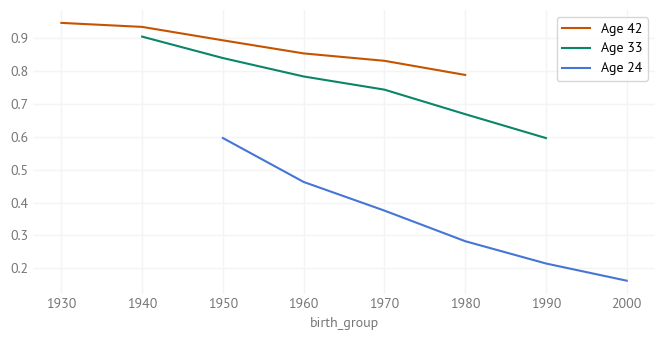

In [225]:
table[42].plot(label='Age 42')
table[33].plot(label='Age 33')
table[24].plot(label='Age 24')
decorate()

In [226]:
df = df_all.dropna(subset=['age_group', 'birth_group', 'evrmarry', 'bach', 'sex']).copy()
df['bach'] = df['bach'].astype(bool)

In [227]:
df['year'].describe()

count    3.138418e+06
mean     1.996262e+03
std      1.442250e+01
min      1.976000e+03
25%      1.983000e+03
50%      1.994000e+03
75%      2.008000e+03
max      2.024000e+03
Name: year, dtype: float64

In [228]:
df['weight'].describe()

count    3.138418e+06
mean     1.008184e+00
std      6.071264e-01
min      0.000000e+00
25%      5.967911e-01
50%      9.092939e-01
75%      1.353775e+00
max      1.360113e+01
Name: weight, dtype: float64

In [229]:
value_counts(df['sex'])

,counts
values,
1.0,1490695
2.0,1647723


In [230]:
df_male = df.query('sex == 1')
df_female = df.query('sex == 2')

## Replicate

In [241]:
subset = df_female.dropna(subset=['cohort', 'bach', 'married']).query('40 <= age <= 49')
subset.shape

(258254, 27)

In [248]:
from utils import resample_rows_weighted

sample = resample_rows_weighted(subset, 'weight')

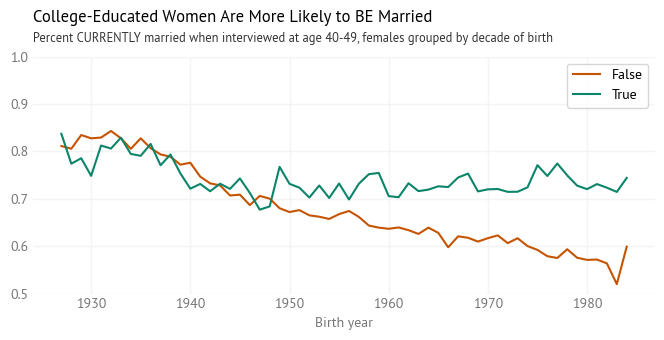

In [249]:
table = sample.pivot_table(index='cohort', columns='bach', 
                           values='married', aggfunc='mean')
table.plot()

title = "College-Educated Women Are More Likely to BE Married"
subtitle = "Percent CURRENTLY married when interviewed at age 40-49, females grouped by decade of birth"
add_title(title, subtitle)

ylim = [0.5, 1.0]
decorate(xlabel='Birth year', ylim=ylim)

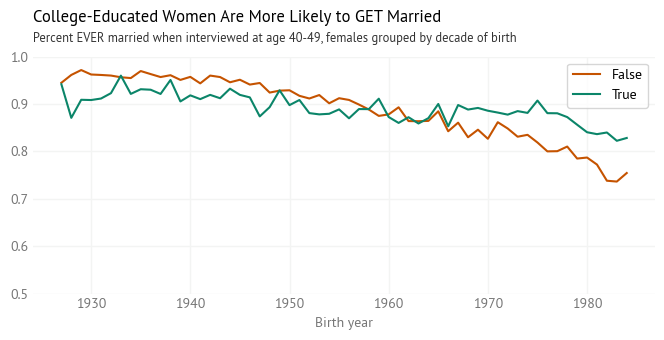

In [250]:
table = sample.pivot_table(index='cohort', columns='bach', 
                           values='evrmarry', aggfunc='mean')
table.plot()

title = "College-Educated Women Are More Likely to GET Married"
subtitle = "Percent EVER married when interviewed at age 40-49, females grouped by decade of birth"
add_title(title, subtitle)

decorate(xlabel='Birth year', ylim=ylim)


## Female respondents

Load the data cleaned in `clean_nsfg.ipynb`

In [152]:
df_female.groupby("birth_group")["bach"].mean()

birth_group
1870.0    0.000000
1880.0    0.033639
1890.0    0.063177
1900.0    0.081733
1910.0    0.085591
1920.0    0.102722
1930.0    0.141480
1940.0    0.223932
1950.0    0.244133
1960.0    0.199977
1970.0    0.193729
1980.0    0.148717
1990.0    0.088726
2000.0    0.009762
2010.0    0.000000
2020.0    0.000000
Name: bach, dtype: float64

## Marriage Tables

In [153]:
from collections import defaultdict
from utils import estimate_proportion

def make_table(resp, column, weight_col='weight'):
    """Make a table with birth_group down the rows and bdegree on the columns."""
    data = defaultdict(dict)
    columns = ["p", "low", "high"]
    subset = resp.dropna(subset=[column, weight_col, 'birth_group', 'bach'])

    # put the results in a dictionary
    for (cohort, degree), group in subset.groupby(["birth_group", "bach"]):
        series = group[column]
        weight = group[weight_col] / group[weight_col].mean()
        row = estimate_proportion(series, weight, confidence_level=0.84)
        data[degree][cohort] = row

    # arrange the results in a DataFrame
    frames = {}
    for degree, results in data.items():
        df = pd.DataFrame.from_dict(results, orient="index", columns=columns)
        frames[degree] = df

    table = pd.concat(frames, axis=1)
    return table * 100

In [154]:
def plot_frame(df, **options):
    """Plot an estimated series with CI"""
    plt.fill_between(df.index, df['low'], df['high'], alpha=0.2)
    plt.plot(df['p'], **options)

def plot_table(table):
    """Plot a table with columns False and True."""
    plot_frame(table[False], label='No degree')
    plot_frame(table[True], label='Degree')

The weights are on different scales in different cycles, so we need to group by cycle and normalize so the mean in each cycle is 1.

In [155]:
table24 = make_table(df_female.query('age_group == 24'), 'evrmarry')
table24

False                            True                       
                p        low       high          p        low       high
1950.0  71.089487  70.632245  71.542478  45.111853  44.064171  46.163886
1960.0  59.286908  58.701317  59.869871  33.959383  32.886370  35.049123
1970.0  48.977325  48.155710  49.799493  30.612073  29.370787  31.882139
1980.0  37.046940  36.226182  37.875249  24.128798  23.036803  25.255571
1990.0  26.926603  26.034215  27.838067  17.653532  16.611994  18.745691
2000.0  18.837428  16.483359  21.441382  17.919631  15.107667  21.124742

In [157]:
table33 = make_table(df_female.query('age_group == 33'), 'evrmarry')
table33

False                            True                       
                p        low       high          p        low       high
1940.0  93.091798  92.784927  93.386548  87.453070  86.629324  88.232961
1950.0  87.951463  87.578375  88.314839  78.763383  77.917804  79.585067
1960.0  81.200201  80.620179  81.766789  80.018425  79.046553  80.956080
1970.0  76.422275  75.679865  77.148864  78.560598  77.593057  79.497400
1980.0  66.510098  65.565811  67.441349  72.805197  71.786758  73.800290
1990.0  56.320626  54.182084  58.435923  68.377830  66.218084  70.461093

In [158]:
table45 = make_table(df_female.query('age_group == 45'), 'evrmarry')
table45

False                            True                       
                p        low       high          p        low       high
1930.0  95.979540  95.737750  96.208157  93.687362  92.881072  94.407829
1940.0  94.782505  94.470775  95.077576  91.530376  90.772703  92.231159
1950.0  91.076451  90.626209  91.507094  89.459608  88.686439  90.185786
1960.0  86.631980  86.086731  87.159049  88.763723  88.018766  89.467903
1970.0  82.866310  82.073170  83.631357  88.224015  87.422397  88.980983
1980.0  80.527170  76.895771  83.708728  87.197364  83.658448  90.060946

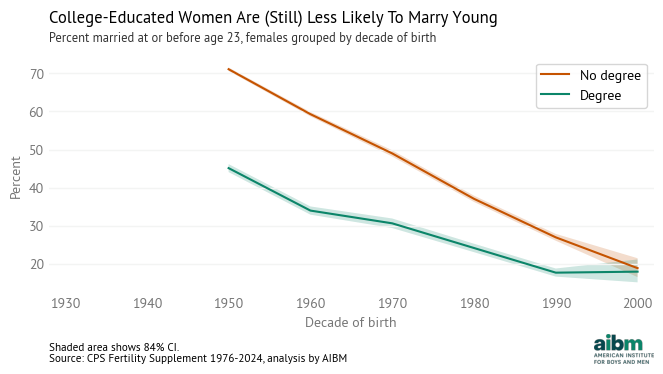

In [159]:
plot_table(table24)

title = "College-Educated Women Are (Still) Less Likely To Marry Young"
subtitle = "Percent married at or before age 23, females grouped by decade of birth"
add_title(title, subtitle)

subtext = """Shaded area shows 84% CI.
Source: CPS Fertility Supplement 1976-2024, analysis by AIBM"""
add_subtext(subtext)

xlim = [1928, 2002]
decorate(xlabel="Decade of birth", ylabel="Percent", xlim=xlim)
inset = add_aibm_logo()
savefig("marriage_education_cps", 1, [inset])

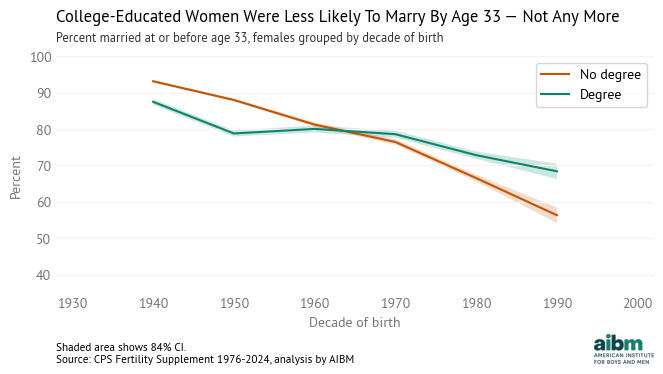

In [160]:
plot_table(table33)

title = "College-Educated Women Were Less Likely To Marry By Age 33 — Not Any More"
subtitle = "Percent married at or before age 33, females grouped by decade of birth"
add_title(title, subtitle)

add_subtext(subtext)

ylim = [35, 100]
decorate(xlabel="Decade of birth", ylabel="Percent", xlim=xlim, ylim=ylim)
inset = add_aibm_logo()
savefig("marriage_education_cps", 3, [inset])

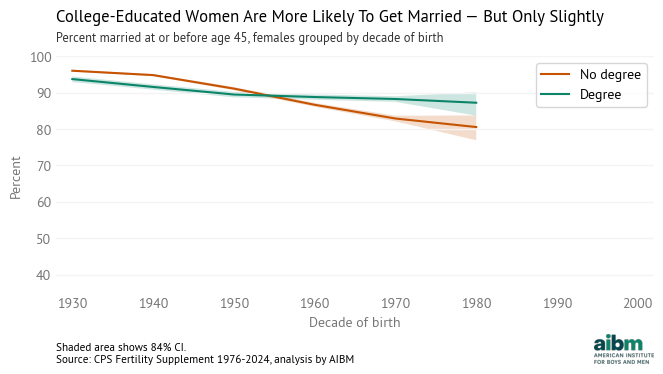

In [161]:
plot_table(table45)

title = "College-Educated Women Are More Likely To Get Married — But Only Slightly"
subtitle = "Percent married at or before age 45, females grouped by decade of birth"
add_title(title, subtitle)

add_subtext(subtext)

decorate(xlabel="Decade of birth", ylabel="Percent", xlim=xlim, ylim=ylim)
inset = add_aibm_logo()
savefig("marriage_education_cps", 5, [inset])

## Male respondents



In [162]:
table24 = make_table(df_male.query('age_group == 24'), 'evrmarry')
table24

False                            True                       
                p        low       high          p        low       high
1950.0  54.811362  54.282903  55.338737  35.992184  34.965219  37.032137
1960.0  39.694093  39.099575  40.291670  21.792893  20.785012  22.835558
1970.0  32.435735  31.663901  33.217237  18.079859  16.897447  19.325770
1980.0  23.988655  23.286258  24.705414  15.069999  14.032318  16.169981
1990.0  16.242701  15.533742  16.977513  12.107583  11.117984  13.172211
2000.0  11.214898   9.544126  13.135679  10.624151   8.177235  13.694072

In [163]:
table33 = make_table(df_male.query('age_group == 33'), 'evrmarry')
table33

False                            True                       
                p        low       high          p        low       high
1940.0  89.496467  89.084700  89.894463  86.095737  85.377175  86.784455
1950.0  82.563971  82.097380  83.020916  77.973052  77.151043  78.773625
1960.0  74.587175  73.910962  75.251731  74.241601  73.140057  75.313218
1970.0  70.102525  69.298903  70.893947  73.741390  72.592892  74.858428
1980.0  57.791580  56.806416  58.770582  66.696284  65.465588  67.904624
1990.0  50.428535  48.380675  52.474959  59.360376  56.866957  61.806465

In [164]:
table45 = make_table(df_male.query('age_group == 45'), 'evrmarry')
table45

False                            True                       
                p        low       high          p        low       high
1930.0  94.104662  93.783362  94.410346  94.868918  94.286026  95.395253
1940.0  93.036046  92.644565  93.408174  92.927737  92.313660  93.496211
1950.0  87.859003  87.311326  88.386185  89.807470  89.030748  90.535041
1960.0  83.193216  82.581912  83.787276  86.733227  85.879440  87.542878
1970.0  79.277383  78.430045  80.099881  88.087110  87.184391  88.934313
1980.0  77.764399  74.101620  81.041687  83.269236  78.949976  86.849846

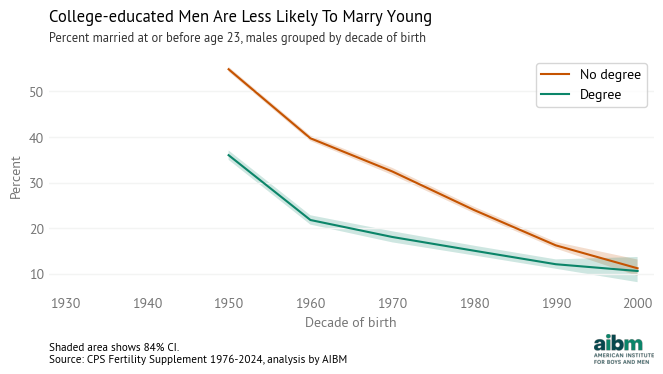

In [165]:
plot_table(table24)

title = "College-educated Men Are Less Likely To Marry Young"
subtitle = "Percent married at or before age 23, males grouped by decade of birth"
add_title(title, subtitle)

add_subtext(subtext)

xlim = [1928, 2002]
decorate(xlabel="Decade of birth", ylabel="Percent", xlim=xlim)
inset = add_aibm_logo()
savefig("marriage_education_cps", 2, [inset])

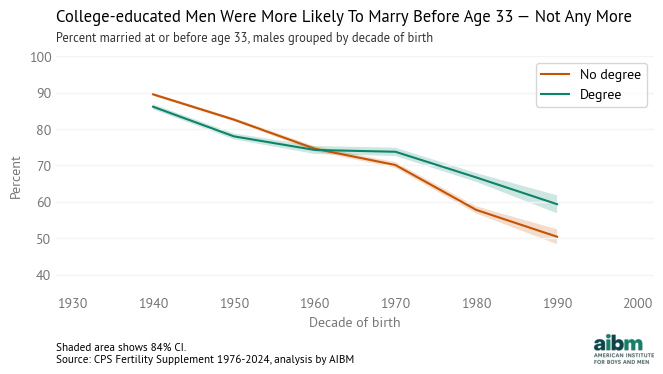

In [166]:
plot_table(table33)

title = "College-educated Men Were More Likely To Marry Before Age 33 — Not Any More"
subtitle = "Percent married at or before age 33, males grouped by decade of birth"
add_title(title, subtitle)

add_subtext(subtext)

ylim = [35, 100]
decorate(xlabel="Decade of birth", ylabel="Percent", xlim=xlim, ylim=ylim)
inset = add_aibm_logo()
savefig("marriage_education_cps", 4, [inset])

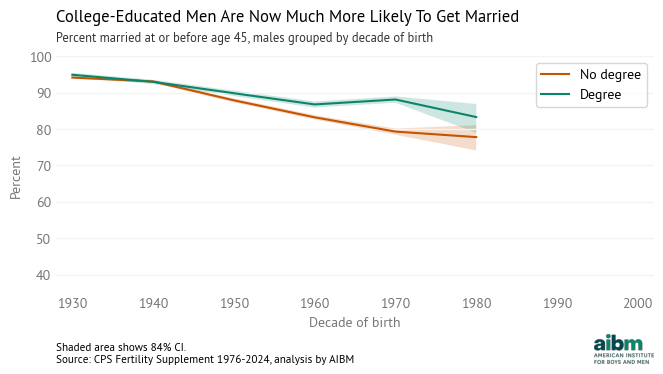

In [167]:
plot_table(table45)

title = "College-Educated Men Are Now Much More Likely To Get Married"
subtitle = "Percent married at or before age 45, males grouped by decade of birth"
add_title(title, subtitle)

add_subtext(subtext)

decorate(xlabel="Decade of birth", ylabel="Percent", xlim=xlim, ylim=ylim)
inset = add_aibm_logo()
savefig("marriage_education_cps", 6, [inset])